<a href="https://www.kaggle.com/code/wonduk/simple-visualization-hollywood-data?scriptVersionId=99057991" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# simple visualization

In [1]:
import pandas as pd 
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt  #create box
import seaborn as sns  #visualize
%matplotlib inline 

plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False 

from sklearn.impute import SimpleImputer #scikit learn used for impute NaN and null values



stories = pd.read_csv("../input/hollywood-most-profitable-stories/HollywoodsMostProfitableStories.csv")
stories = stories.rename(columns=lambda x: x.replace(" ","_"))

In [2]:
stories.columns

Index(['Film', 'Genre', 'Lead_Studio', 'Audience__score_%', 'Profitability',
       'Rotten_Tomatoes_%', 'Worldwide_Gross', 'Year'],
      dtype='object')

In [3]:
stories.shape

(74, 8)

In [4]:
stories.head(5)

,Film,Genre,Lead_Studio,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [5]:
stories.tail(5)
stories.shape

(74, 8)

## Null Values

In [6]:
stories.isnull().sum()

Film                 0
Genre                0
Lead_Studio          1
Audience__score_%    1
Profitability        3
Rotten_Tomatoes_%    1
Worldwide_Gross      0
Year                 0
dtype: int64

<AxesSubplot:>

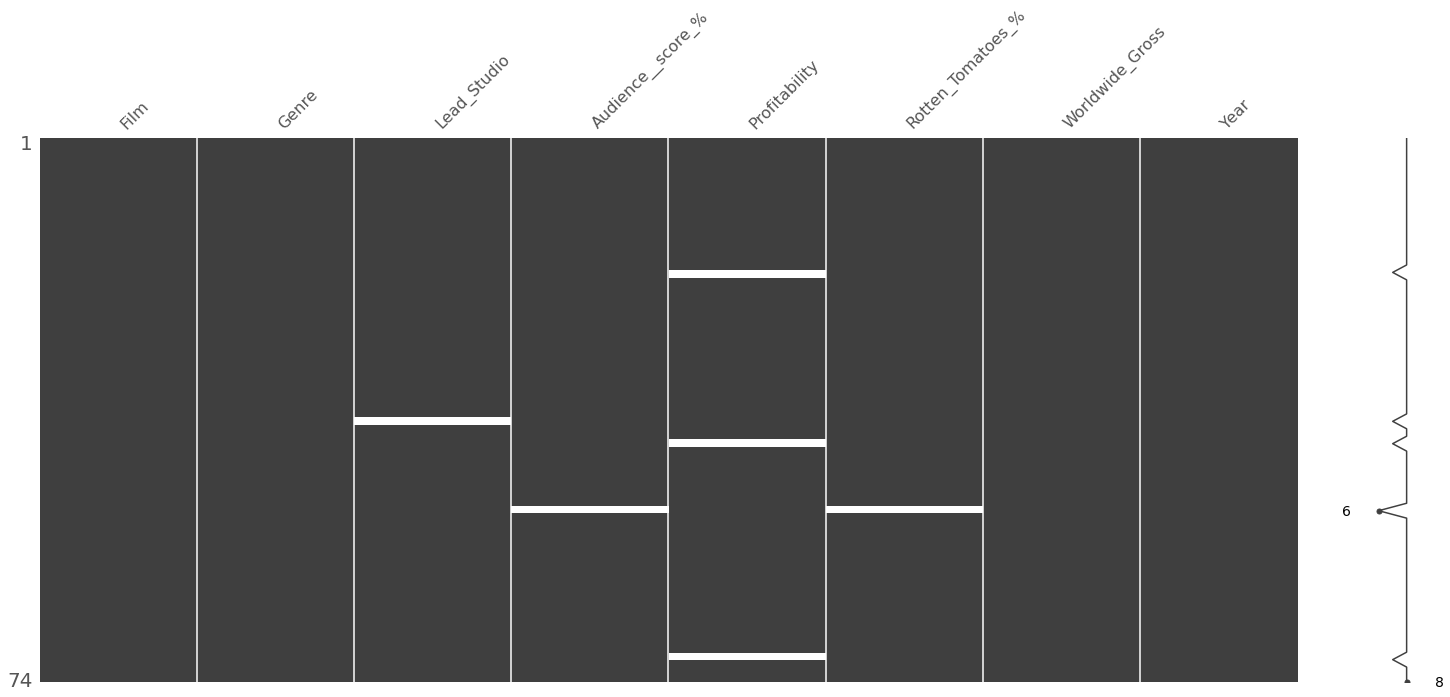

In [7]:
msno.matrix(stories)

cleaning null values

In [8]:
stories["Audience__score_%"] = stories["Audience__score_%"].fillna(0)
stories["Profitability"] = stories["Profitability"].fillna(0)
stories["Rotten_Tomatoes_%"] = stories["Rotten_Tomatoes_%"].fillna(0)

imputer = SimpleImputer(missing_values=0, strategy = 'mean')

stories["Audience__score_%"] = imputer.fit_transform(stories['Audience__score_%'].values.reshape(-1,1))
stories["Profitability"] = imputer.fit_transform(stories["Profitability"].values.reshape(-1,1))
stories["Rotten_Tomatoes_%"] = imputer.fit_transform(stories["Rotten_Tomatoes_%"].values.reshape(-1,1))

stories = stories.dropna()

<AxesSubplot:>

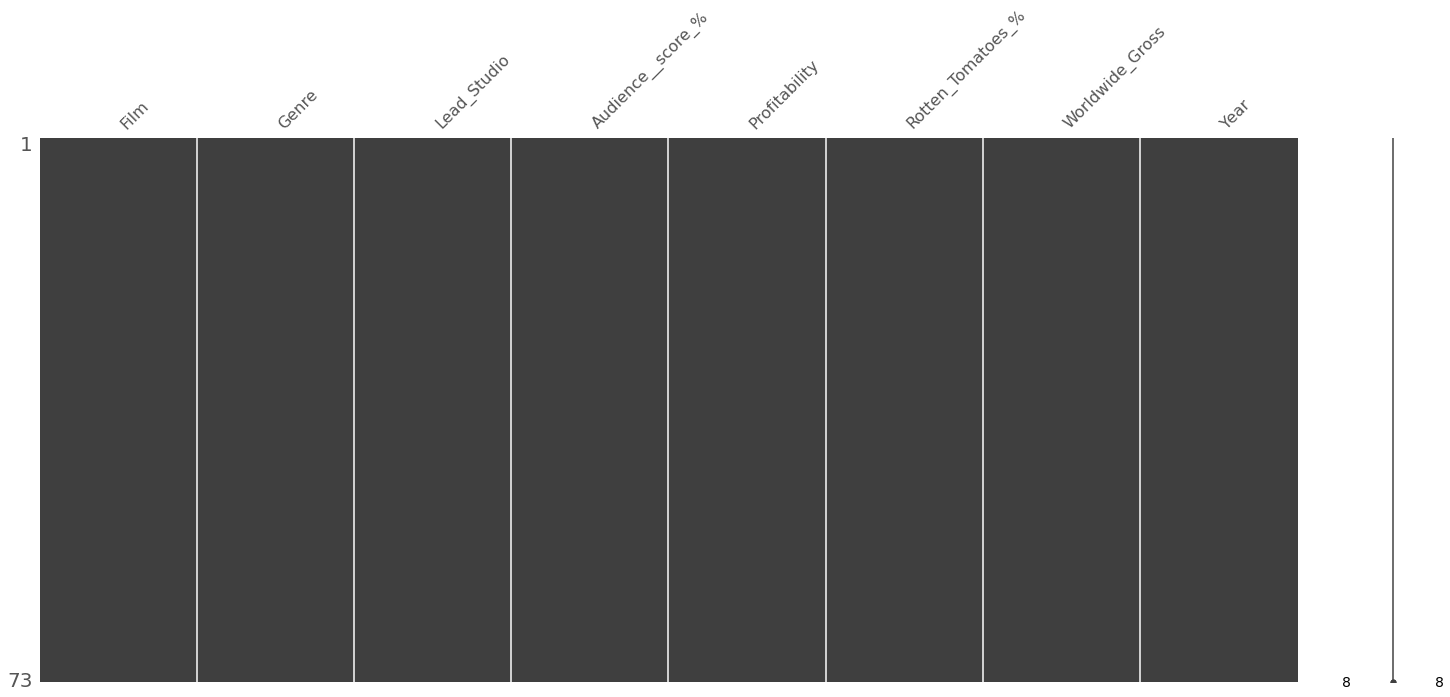

In [9]:
msno.matrix(stories)

cleaned successfully

In [10]:
stories.shape

(73, 8)

## Genre

In [11]:
genre = stories.Genre.value_counts()

<AxesSubplot:>

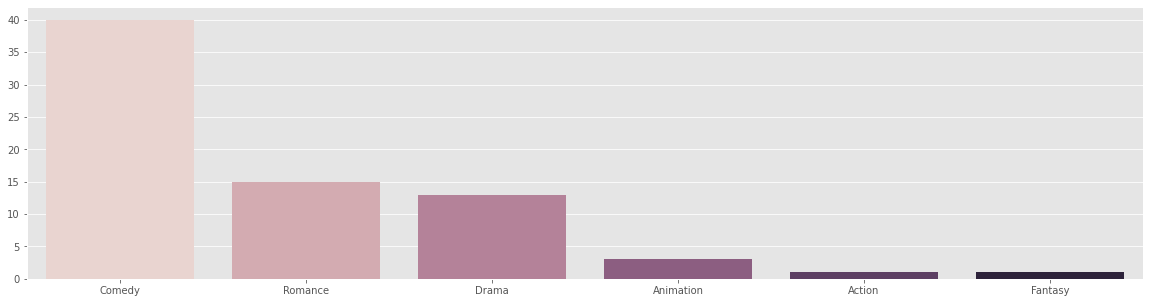

In [12]:
plt.figure(figsize=(20,5))
sns.barplot(x=genre.index,y=genre.values, palette = "ch:30")

## Lead Studio

In [13]:
studio = stories.Lead_Studio.value_counts()

<AxesSubplot:>

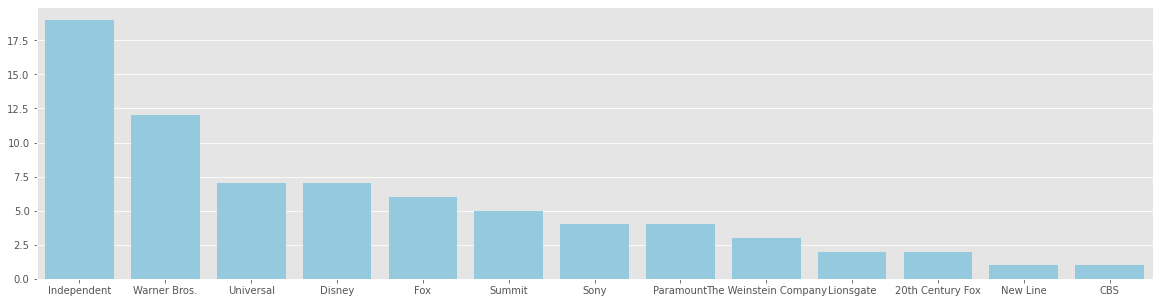

In [14]:
plt.figure(figsize=(20,5))
sns.barplot(x=studio.index,y=studio.values, color='skyblue')

## Audience Score

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Audience__score_%', ylabel='Density'>

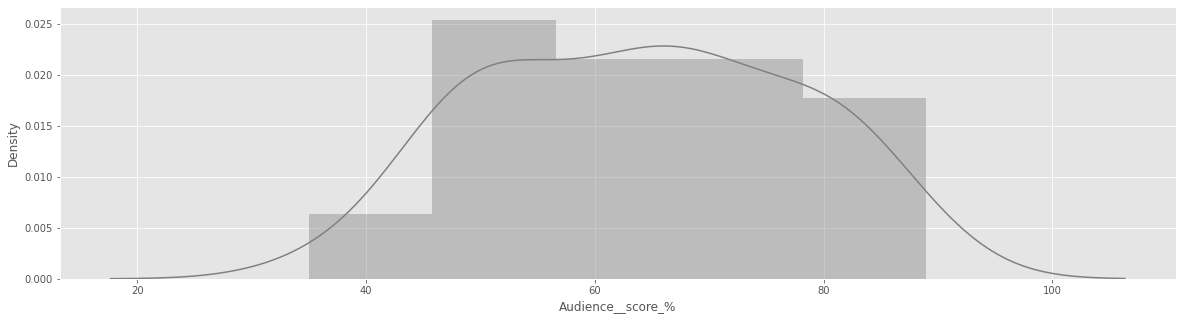

In [15]:
plt.figure(figsize=(20,5))
sns.distplot(stories["Audience__score_%"],color='gray')

## Profitability

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profitability', ylabel='Density'>

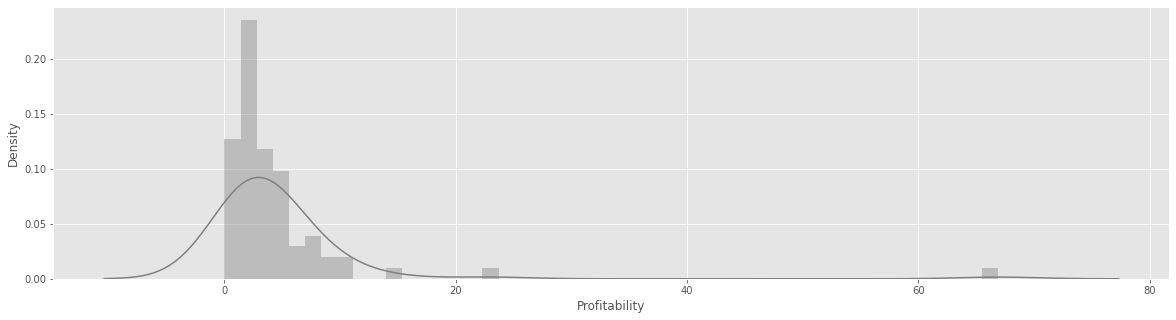

In [16]:
plt.figure(figsize=(20,5))
sns.distplot(stories["Profitability"],color='gray')

correlation

<AxesSubplot:>

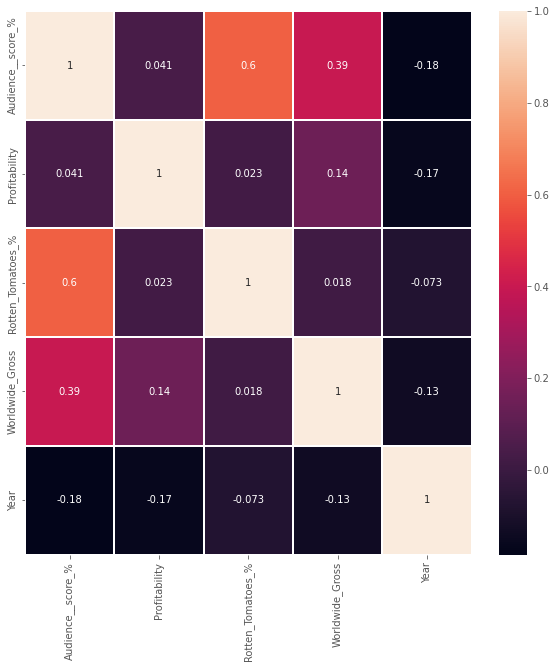

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(stories.corr(), annot=True, linewidths=.3)

## Genre with Profitability

In [18]:
pd.set_option('display.max_rows',None)
stories

,Film,Genre,Lead_Studio,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross,Year
0,27 Dresses,Comedy,Fox,71.000000,5.343622,40.000000,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.000000,8.096000,87.000000,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.000000,0.448645,79.000000,8.972895,2011
3,A Serious Man,Drama,Universal,64.000000,4.382857,89.000000,30.680000,2009
4,Across the Universe,Romance,Independent,84.000000,0.652603,54.000000,29.367143,2007
5,Beginners,Comedy,Independent,80.000000,4.471875,84.000000,14.310000,2011
6,Dear John,Drama,Sony,66.000000,4.598800,29.000000,114.970000,2010
7,Enchanted,Comedy,Disney,80.000000,4.005737,93.000000,340.487652,2007
8,Fireproof,Drama,Independent,51.000000,66.934000,40.000000,33.467000,2008
9,Four Christmases,Comedy,Warner Bros.,52.000000,2.022925,26.000000,161.834000,2008


Index(['Action', 'Animation', 'Comedy', 'Drama', 'Fantasy', 'Romance'], dtype='object', name='Genre') [1.24533333 3.2165612  3.9914489  8.40721842 1.78394375 4.39607924]


<AxesSubplot:xlabel='Genre'>

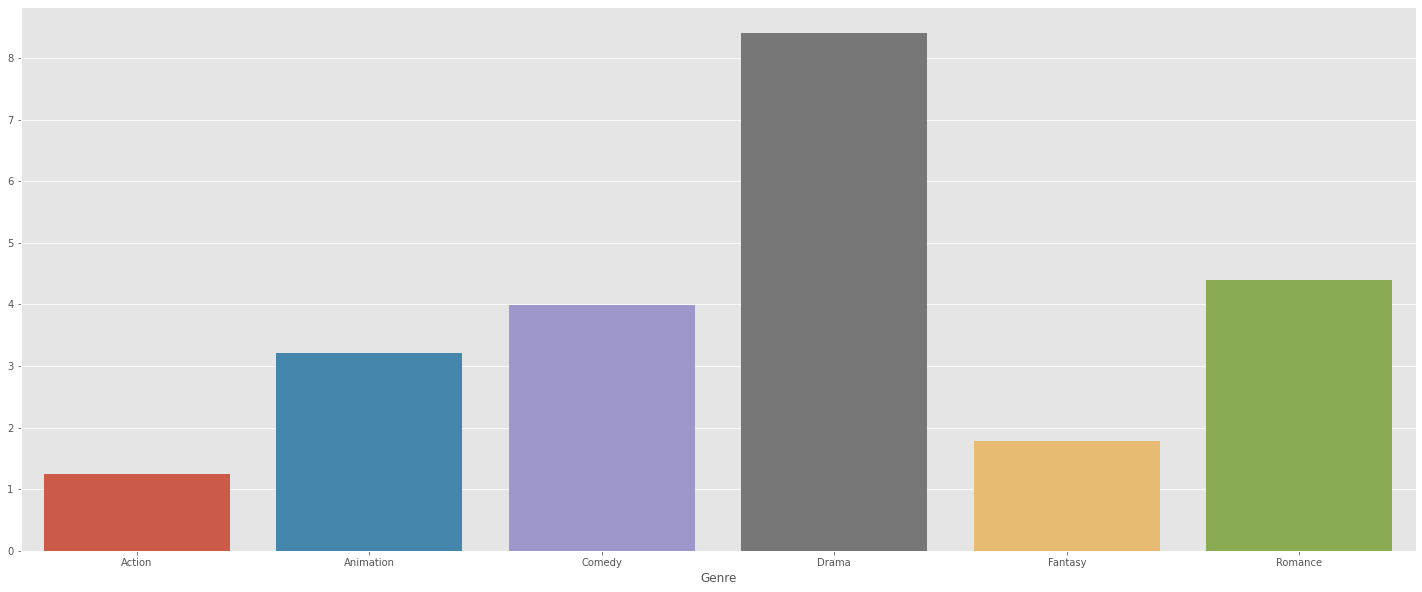

In [19]:
genre = stories.groupby('Genre').mean().Profitability

indx = genre.index
vals = genre.values
print(indx, vals)
plt.figure(figsize=(25,10))
sns.barplot(x=indx,y=vals)

## Lead_Studio with Worldwide Gross

<AxesSubplot:xlabel='Lead_Studio'>

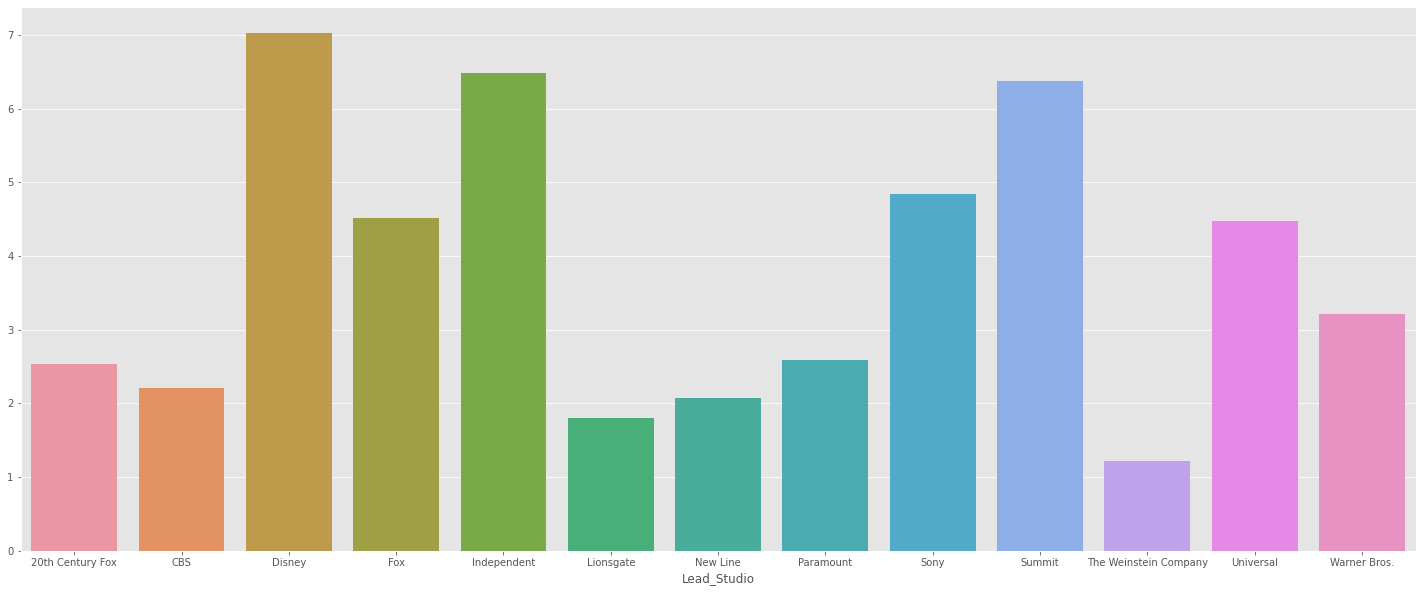

In [20]:
Lead_Studio = stories.groupby('Lead_Studio').mean().Profitability

indx = Lead_Studio.index
vals = Lead_Studio.values

plt.figure(figsize=(25,10))
sns.barplot(x=indx,y=vals)

## Worldwide Gross with Profitability

<AxesSubplot:xlabel='Worldwide_Gross', ylabel='Profitability'>

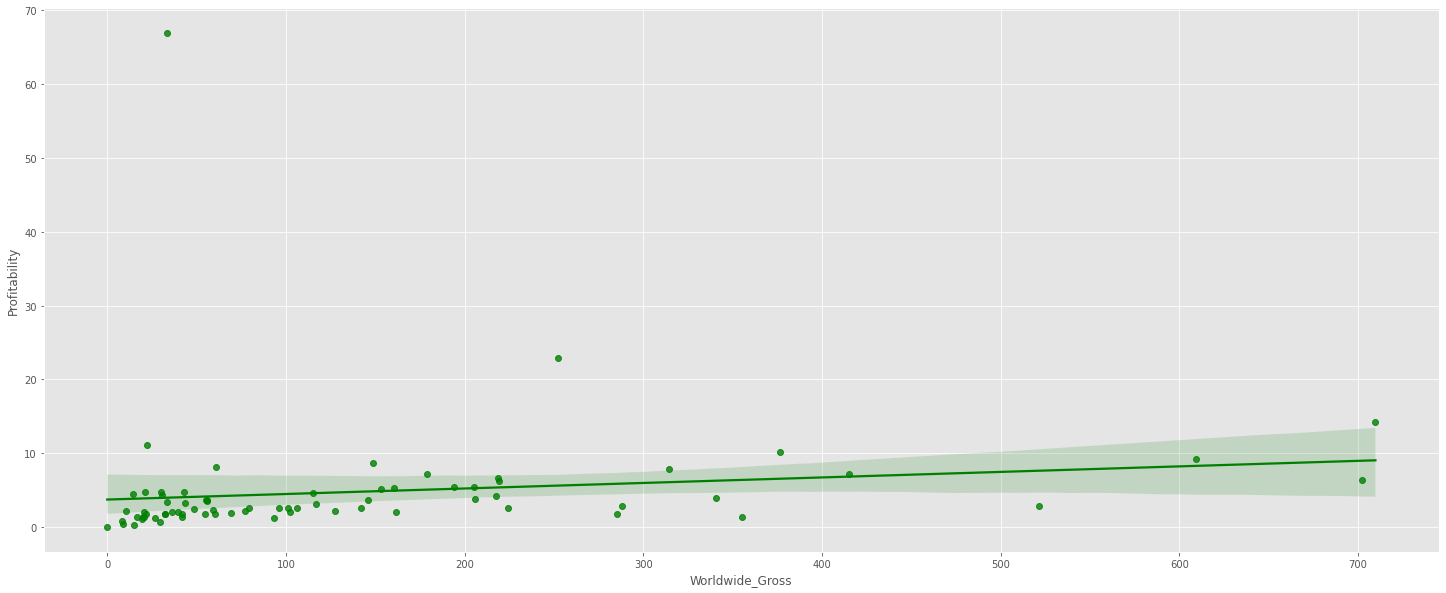

In [21]:
fig, ax = plt.subplots() 
fig.set_size_inches(25,10)
sns.regplot(x='Worldwide_Gross',y='Profitability',data=stories, color='g')

In [22]:
stories.columns

Index(['Film', 'Genre', 'Lead_Studio', 'Audience__score_%', 'Profitability',
       'Rotten_Tomatoes_%', 'Worldwide_Gross', 'Year'],
      dtype='object')

## Rotten Tomatoes with Profitability

<AxesSubplot:xlabel='Rotten_Tomatoes_%', ylabel='Profitability'>

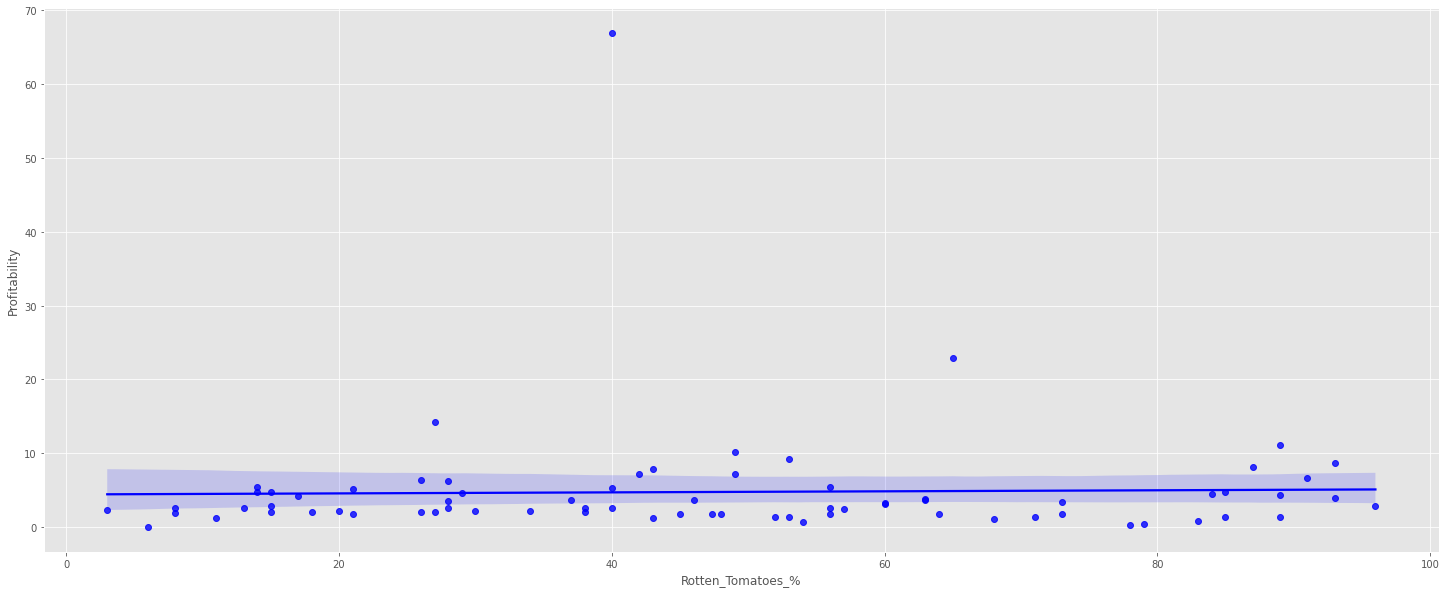

In [23]:
fig, ax = plt.subplots() 
fig.set_size_inches(25,10)
sns.regplot(x='Rotten_Tomatoes_%',y='Profitability',data=stories, color='b')

## Year with Worldwide Gross (with animation tool)

here, i used animation tool called 'Camera' to animate data.

In [24]:
year_worldwide_Gross = stories.groupby("Year").mean('Worldwide_Gross')
year_worldwide_Gross

,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross
Year,,,,
2007,67.000000,4.133654,49.800000,122.215435
2008,69.789474,8.136442,53.789474,186.272113
2009,62.750000,5.023312,44.250000,167.282500
2010,55.684211,2.492157,37.473684,89.894684
2011,67.318230,3.385559,54.027397,116.979377


In [25]:
! pip install celluloid
from celluloid import Camera
%matplotlib notebook 

In [26]:
from celluloid import Camera
%matplotlib notebook 

In [27]:
year_worldwide_Gross

,Audience__score_%,Profitability,Rotten_Tomatoes_%,Worldwide_Gross
Year,,,,
2007,67.000000,4.133654,49.800000,122.215435
2008,69.789474,8.136442,53.789474,186.272113
2009,62.750000,5.023312,44.250000,167.282500
2010,55.684211,2.492157,37.473684,89.894684
2011,67.318230,3.385559,54.027397,116.979377


In [28]:
fig = plt.figure()

plt.ylim(0,200)

fig.set_size_inches(10,5)
camera = Camera(fig)  # set size


for i in range(0,len(year_worldwide_Gross)+1):
    gross = year_worldwide_Gross.Worldwide_Gross.index[:i]
    ww_gross = year_worldwide_Gross.Worldwide_Gross.values[:i]

    plt.plot(gross, ww_gross, linestyle = 'solid', color = 'b')
    fig.tight_layout()
    camera.snap()
    
animation = camera.animate(interval = 1000, repeat = True,
                           repeat_delay = 50)

from IPython.display import HTML
HTML(animation.to_html5_video())

<IPython.core.display.Javascript object>

In [29]:
# fig .set_size_inches(10,10)
# sns.pointplot(x = year_worldwide_Gross.index, y=year_worldwide_Gross.Worldwide_Gross, color='c')